In [4]:
!pip3 install pandas numpy

  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl (11.3 MB)
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   ------ --------------------------------- 2.1/13.1 MB 13.0 MB/s eta 0:00:01
   ----------------------------------- ---- 11.5/13.1 MB 31.4 MB/s eta 0:00:01
   ---------------------------------------- 13.1/13.1 MB 28.3 MB/s  0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ----------------------------------------

In [16]:
!pip3 install seaborn

  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 6.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 10.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 12.3 MB/s  0:00:00
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
   ---------------------

In [35]:
import numpy as np
import pandas as pd
books=pd.read_csv("books.csv")
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
books['missing_description']=np.where(books['description'].isna(),1,0)

In [10]:
columns_of_interest=["num_pages","missing_description","average_rating"]

In [11]:
books.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing_description'],
      dtype='object')

In [12]:
corelation_matrix=books[columns_of_interest].corr(method="spearman")

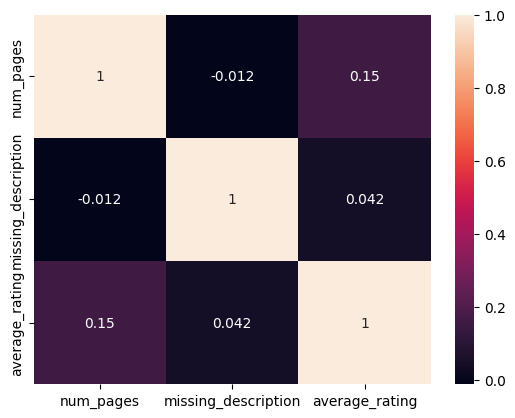

In [29]:
sns.heatmap(corelation_matrix,annot=True)
plt.show()

In [30]:
books.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

In [31]:
books_missing=books[(books["description"].isna())|(books["categories"].isna())|(books["num_pages"].isna())|(books["average_rating"].isna())|(books['published_year'].isna())]

In [ ]:
books_missing["categories"].value_counts().sort_values("count").reset_index()


,categories,count
0,Fiction,65
1,Biography & Autobiography,10
2,Comics & Graphic Novels,7
3,History,6
4,Drama,6
...,...,...
103,Short stories,1
104,Construction workers,1
105,American literature,1
106,Mysticism,1


In [36]:
books_missing["word_in_description"]=books_missing["description"].str.split().str.len()

In [39]:
books_missing.loc[books_missing['word_in_description'].between(5,14),"description"]

884     Screenplay, revised primarily in April, throug...
3554    Detectives Carson O'Connor and Michael Maddiso...
5958    The brilliant historical epic “Metamorphoses” ...
6256    Police officer Rick Grimes and a few human sur...
Name: description, dtype: object

In [44]:
book_missing_25_words=books_missing[books_missing["word_in_description"]>=25]

In [47]:
book_missing_25_words["tagged_descriptions"]=book_missing_25_words[["isbn13","word_in_description"]].astype(str).agg(" ".join,axis=1)

In [ ]:
## vector search

In [ ]:
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_community.document_loaders import TextLoader
from dotenv import load 


In [ ]:
books["tagged_description"].to_csv("tagged_description.txt",sep="\n",index=False,header=False)
raw_documents=TextLoader("tagged_description.txt").load()
text_splitter=CharacterTextSplitter(chunk_size=0,chunk_overload=0,seperator="\n")


In [ ]:
documents[0]

In [ ]:
db_books=Chroma.from_documents(documents,embeddings=OpenAIEmbeddings())
query="A book to teach children about nature"
docs=db_books.similarity_search(query,k=10)
docs

In [ ]:
books[books['isbn13']]=int(docs[0].page_content.split()[0].strip())

In [ ]:
def retrieve_semantic_recomendation():
    recs=db_books.similarity_search(query,k=50)
    book_list=[]
    for i in range(0,len(recs)):
        book_list+=[int(recs[i].page_content.strip("*").split()[0])]
    return books